## 1\. Sobre o conjunto de dados

Uma empresa que atua em Big Data e Data Science deseja <font color='salmon'>**contratar cientistas de dados**</font> entre pessoas que foram aprovadas em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o treinamento. A empresa quer saber <font color='salmon'>**qual desses candidatos realmente quer trabalhar para a empresa após o treinamento ou se procurando um novo emprego**</font>, pois ajuda a reduzir o custo e o tempo, bem como a qualidade do treinamento, planejamento dos cursos e categorização dos candidatos. Informações relacionadas a dados demográficos, educação e experiência estão em mãos desde a inscrição e inscrição dos candidatos.

Este conjunto de dados foi projetado para entender os fatores que levam uma pessoa a deixar o emprego atual (pesquisas de RH). Pelo(s) modelo(s) que usam as credenciais atuais, dados demográficos e dados de experiência, <font color='salmon'>**você preverá a probabilidade de um candidato procurar um novo emprego ou trabalhar para a empresa, bem como interpretar os fatores afetados na decisão do funcionário**</font>.

Todos os dados estão divididos para treinar e testar. O alvo não está incluído no teste, mas o arquivo de dados dos valores do alvo de teste está em mãos para tarefas relacionadas. Um envio de amostra corresponde a `registeree_id` do conjunto de teste fornecido também com as colunas: `registeree_id`, `target`.

**Notas:**

* Os dados estão desbalanceados.
* A maioria dos recursos são categóricos (Nominal, Ordinal, Binário), alguns com alta cardinalidade.
* A imputação ausente também pode fazer parte do seu pipeline.


***Features*:**

<center>

| coluna                      | descricão                                                          |
| --------------------------- | ------------------------------------------------------------------ |
| enrollee_id                 | Identificador único de cad candidato                               |
| city                        | Código da cidade                                                   |
| city \_ development \_index | Índice de desenvolvimento da cidade (em escala)                    |
| gender                      | Gênero de cada candidato                                           |
| relevent_experience         | Relevância da experiência de cada candidato                        |
| enrolled_university         | Tipo de curso universitário matriculado, se houver                 |
| education_level             | Nível de escolaridade de cada candidato                            |
| major_discipline            | Disciplina principal do candidato                                  |
| experience                  | Experiência total do candidato em anos                             |
| company_size                | Número de funcionários na empresa do empregador atual              |
| company_type                | Tipo de empregador atual                                           |
| last_new_job                | Diferença em anos entre o emprego anterior e o atual               |
| training_hours              | Horas de treinamento concluídas                                    |
| target                      | 0 – Não procura mudança de emprego, 1 – Procura mudança de emprego |

</center>

Fonte: [Kaggle](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015)

**Inspiração:**

* Prever a probabilidade de um candidato trabalhar para a empresa;
* Interpretar o(s) modelo(s) de forma a ilustrar quais recursos afetam a decisão do candidato.

## 2\. Pacotes e datasets

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
train_raw = pd.read_csv('https://raw.githubusercontent.com/vihmalmsteen/vihmalmsteen/main/datasets/HR%20datasets/aug_train.csv')
test_raw = pd.read_csv('https://raw.githubusercontent.com/vihmalmsteen/vihmalmsteen/main/datasets/HR%20datasets/aug_test.csv')
target_raw = pd.read_csv('https://raw.githubusercontent.com/vihmalmsteen/vihmalmsteen/main/datasets/HR%20datasets/sample_submission.csv')

In [4]:
train = train_raw.copy()
test = test_raw.copy()
target = target_raw.copy()

In [5]:
print(f'train shape: {train_raw.shape}')
print(f'test shape: {test_raw.shape}')
print(f'target shape: {target_raw.shape}')

train shape: (19158, 14)
test shape: (2129, 13)
target shape: (2129, 2)


In [6]:
dataset_raw = pd.concat([train,pd.merge(left=test, right=target, on='enrollee_id')]).reset_index(drop=True)
dataset = dataset_raw.copy()
print(f'dataset shape: {dataset.shape}', '\n')
dataset.head()

dataset shape: (21287, 14) 



,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
dataset.target.unique()  # 0.5 -> test

array([1. , 0. , 0.5])

## 3\. Wrangling

#### 3.1. **Checagem geral**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### 3.2. **Dados ausentes**

Algumas cols têm muitos dados ausentes.

In [9]:
(pd.DataFrame(dataset.isna().sum())
              .reset_index()
              .rename(columns=({'index':'col', 0:'total_NaNs'}))
              .sort_values('total_NaNs', ascending=False)
              .query('total_NaNs != 0')
)

,col,total_NaNs
10,company_type,6774
9,company_size,6560
3,gender,5016
7,major_discipline,3125
6,education_level,512
11,last_new_job,463
5,enrolled_university,417
8,experience,70


Dropar os nulos simplesmente jogaria fora muita informação. Buscar tratá-los.

In [10]:
len(dataset.dropna())

9974

De 4 dígitos pra cima de dados ausentes, rotular (`not filled`), considerando que a ausência de resposta também é uma resposta. Depois, dropar os demais ausentes:

In [11]:
cols =  ['company_type', 'company_size', 'gender', 'major_discipline']
for col in cols:
  dataset[f'{col}'] = dataset[f'{col}'].fillna('not filled')
dataset = dataset.dropna()

print(f'shape: {dataset.shape}', '\n')
dataset.isna().sum()

shape: (20032, 14) 



enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### 3.3. **Clusterizando a experiência (`experience`)**

Seria viável trabalhar com variáveis discretas se registros acima de 20 anos os fossem. Como não são, alocar em grupos as experiências abaixo de 20 anos:

In [12]:
dataset['experience'].unique()

array(['>20', '15', '5', '11', '13', '7', '17', '2', '16', '1', '4', '10',
       '<1', '14', '18', '19', '12', '6', '9', '3', '8', '20'],
      dtype=object)

In [13]:
# 1. function
def troca(reg):
  try:
    reg = float(reg)
    if reg >=1 and reg <=5:
      reg = '1-5'
    elif reg >=6 and reg <=10:
      reg = '6-10'
    elif reg >=11 and reg <=15:
      reg = '11-15'
    elif reg >=16 and reg <=20:
      reg = '16-20'
    elif reg > 20:
      reg = '>20'
    elif reg < 1:
      reg = '<1'
  except ValueError:
    reg = reg
  return reg

# 2. function em map
print(f"antes: {dataset['experience'].unique()}")
dataset['experience'] = dataset['experience'].map(lambda x: troca(x))
print(f"depois: {dataset['experience'].unique()}")

antes: ['>20' '15' '5' '11' '13' '7' '17' '2' '16' '1' '4' '10' '<1' '14' '18'
 '19' '12' '6' '9' '3' '8' '20']
depois: ['>20' '11-15' '1-5' '6-10' '16-20' '<1']


<ipython-input-13-bdf5397e24dc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['experience'] = dataset['experience'].map(lambda x: troca(x))


#### 3.4. **Balanceamento**

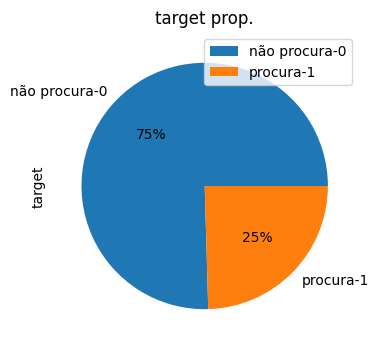

In [14]:
(
    dataset.query("target != 0.5")['target'].value_counts()
    .plot(kind='pie', figsize=(6,4), title='target prop.', 
          autopct='%.0f%%', labels=['não procura-0', 'procura-1'])
)
plt.legend(loc='upper right');

Nos dados de treino, há muito mais casos de pessoas que não pretendem mudar de emprego (75%) do que pessoas que pretendem mudar (25%). Ou seja, a amostra de teste está desbalanceada.

**Dados desbalanceados:** 

São dados cujas as classes (variáveis dependentes), *outputs* do modelo, têm um número bastante diferente.

É como se quisessemos prever se uma pessoa pode vir a desenvolver uma doença muito rara. Haveria poucos registros de casos da doença e o modelo tenderia a prever sempre que a pessoa não terá a doença. Ou seja, é tendencioso. 

E muitas vezes, a assertividade/acurária do modelo é enganosa em dados assim. Uma vez que a acurácia é uma medida de probabilidade (acertos sobre o total), um modelo em que uma classe é "rara", com 1% de presença no dataset (ter a doença), dificilmente ele preveria estes casos e diria o oposto (não ter a doença). Assim, a acurácia seria alta, mas preveria errado justamente aquilo que o modelo deve fazer (dizer quem tem a doença) uma vez que seu peso no modelo é muito baixo.

Dos métodos de correção no pré-processamento, pode-se utilizar *resampling*, redistribuição das classes preditas, seja para mais ou para menos:

<center>

| RESAMPLING    | INTUITO                                   | MÉTODOS                                                         |
| ------------- | ----------------------------------------- | --------------------------------------------------------------- |
| Undersampling | **remover** registros da **classe majoritária**   | Random Under Sampling, Tomek Links, Nearest Neighbour Cleaning. |
| Oversampling  | **adicionar** registros da **classe minoritária** | Random Over Sampling, ADASYN, SMOTE e variantes.                |

</center>

Um pacote feito para tratar esse problema de amostragem é o [**`imblearn`**](https://imbalanced-learn.org/stable/user_guide.html).

A avaliação do quanto o modelo está acertando cada classificação pode ser feita via *confusion matrix*:

<center>

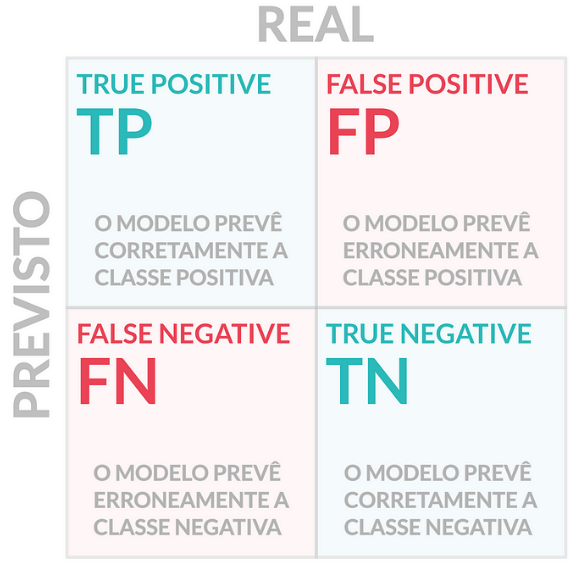

</center>

## 4\. Análise exploratória - EDA

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20032 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             20032 non-null  int64  
 1   city                    20032 non-null  object 
 2   city_development_index  20032 non-null  float64
 3   gender                  20032 non-null  object 
 4   relevent_experience     20032 non-null  object 
 5   enrolled_university     20032 non-null  object 
 6   education_level         20032 non-null  object 
 7   major_discipline        20032 non-null  object 
 8   experience              20032 non-null  object 
 9   company_size            20032 non-null  object 
 10  company_type            20032 non-null  object 
 11  last_new_job            20032 non-null  object 
 12  training_hours          20032 non-null  int64  
 13  target                  20032 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

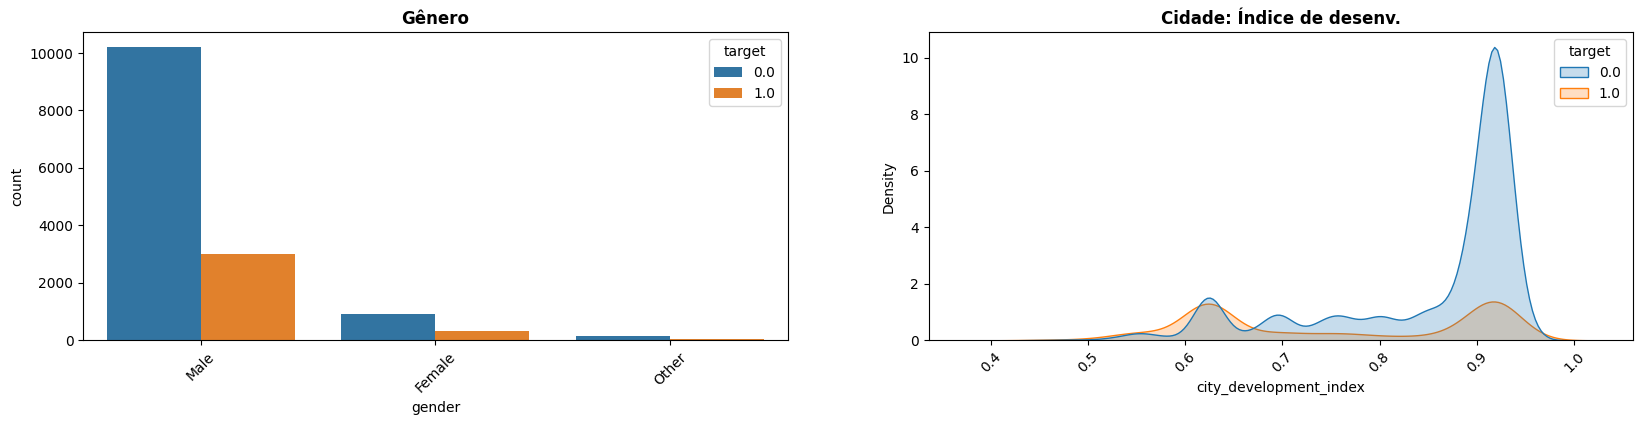

In [16]:
# demograficos
fig, ax = plt.subplots(1, 2, figsize=(20,4))

sns.countplot(data=train, x='gender', hue='target', ax=ax[0])
ax[0].set_title('Gênero', fontweight='bold');
ax[0].tick_params(labelrotation=45, axis='x')

sns.kdeplot(data=train, x='city_development_index', fill=True, hue='target', ax=ax[1])
ax[1].set_title('Cidade: Índice de desenv.', fontweight='bold');
ax[1].tick_params(labelrotation=45, axis='x')

Homens são muito presentes nos dados. Principalmente aqueles que não procuram uma mudança de empresa (target=0).
Em cidades mais desenvolvidas há mais pessoas procurando uma mudança de emprego. Certamente há outliers uma vez que a curva se extende muito à esquerda.

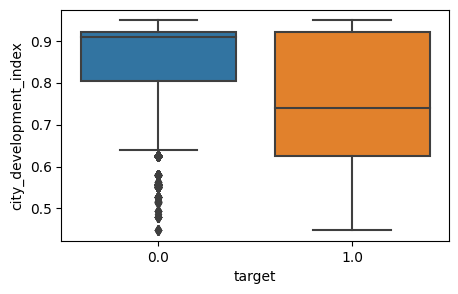

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
sns.boxplot(data=train, x='target', y='city_development_index');

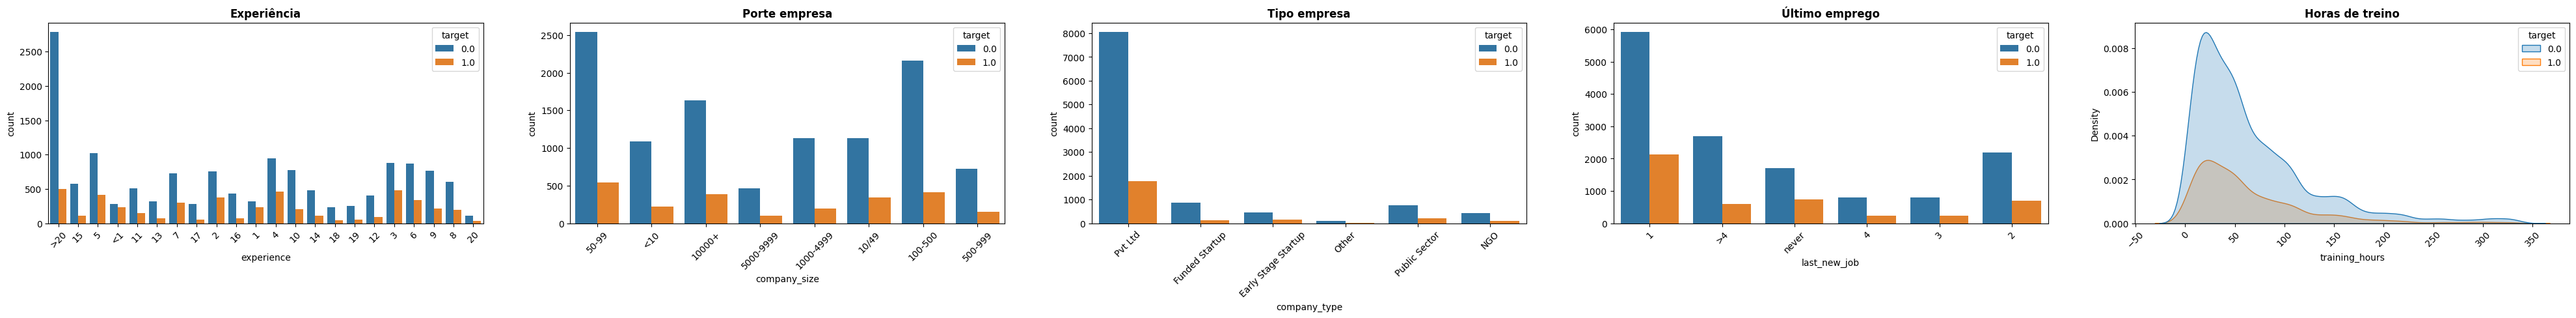

In [18]:
# profissional
fig, ax = plt.subplots(1, 5, figsize=(50,4))

sns.countplot(data=train, x='experience', hue='target', ax=ax[0])
ax[0].set_title('Experiência', fontweight='bold');
ax[0].tick_params(labelrotation=45, axis='x')

sns.countplot(data=train, x='company_size', hue='target', ax=ax[1])
ax[1].set_title('Porte empresa', fontweight='bold');
ax[1].tick_params(labelrotation=45, axis='x')

sns.countplot(data=train, x='company_type', hue='target', ax=ax[2])
ax[2].set_title('Tipo empresa', fontweight='bold');
ax[2].tick_params(labelrotation=45, axis='x')

sns.countplot(data=train, x='last_new_job', hue='target', ax=ax[3])
ax[3].set_title('Último emprego', fontweight='bold');
ax[3].tick_params(labelrotation=45, axis='x')

sns.kdeplot(data=train, x='training_hours', fill=True, hue='target', ax=ax[4])
ax[4].set_title('Horas de treino', fontweight='bold');
ax[4].tick_params(labelrotation=45, axis='x')

**Experiência:** Pessoas entre 1 a 10 anos de experiência a procura por uma nova oportunidade é mais elevada. Os grupos de 1 a 5 e de 6 a 10 anos de experiêcia são os mais abundantes.

**Porte empresa:** A resposta sobre o porte da última empresa teve bastante abstenção. Mas, das pessoas que responderam os dados são bem distribuidos entre os grupos, e a grande maioria dentro deles não pretende mudar de emprego.

**Tipo empresa:** A grande maioria das pessoas é de empresa privada ('Pvt Ltd'). E dentro destes grupos poucas pessoas querem mudar de emprego.

**Último emprego:** O grupo que se destaca é o de até 1 ano desde o último emprego. 

**Horas de treino:** A concentração de pessoas com menos tempo de treinamento é maior.

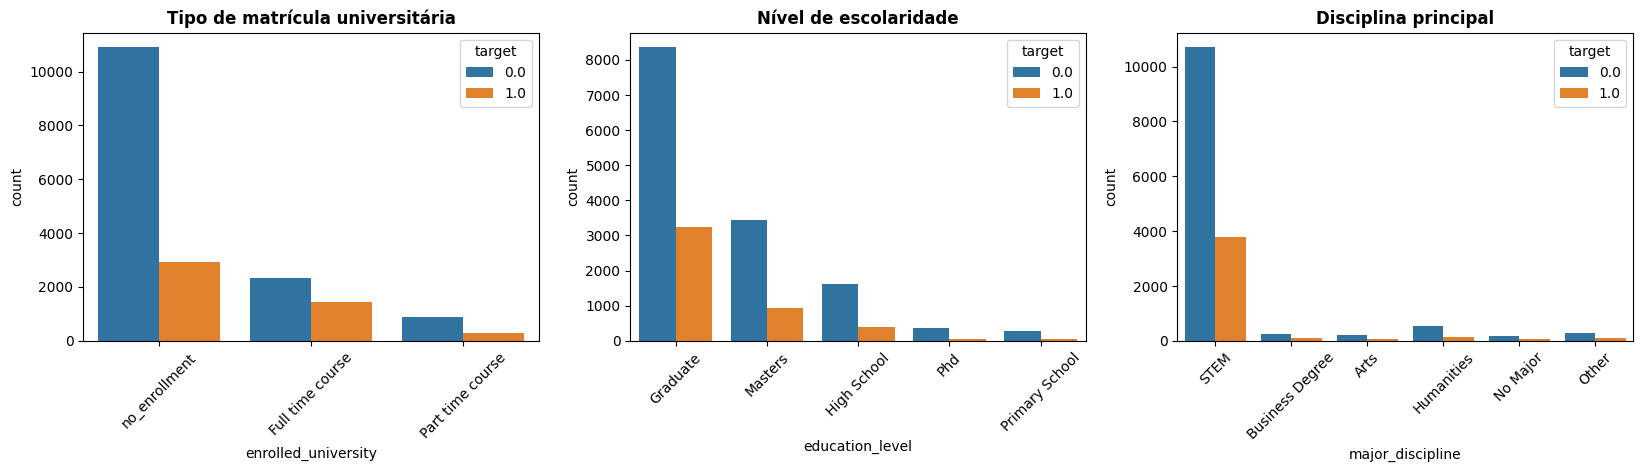

In [19]:
# dados educacionais:

fig, ax = plt.subplots(1, 3, figsize=(20,4))

sns.countplot(data=train, x='enrolled_university', hue='target', ax=ax[0])
ax[0].set_title('Tipo de matrícula universitária', fontweight='bold');
ax[0].tick_params(labelrotation=45, axis='x')

sns.countplot(data=train, x='education_level', hue='target', ax=ax[1])
ax[1].set_title('Nível de escolaridade', fontweight='bold');
ax[1].tick_params(labelrotation=45, axis='x')

sns.countplot(data=train, x='major_discipline', hue='target', ax=ax[2])
ax[2].set_title('Disciplina principal', fontweight='bold');
ax[2].tick_params(labelrotation=45, axis='x')

In [20]:
# pessoas que nao tem matricula (no_enrollment) agrupadas pelo seu nivel escolar
(train.query('enrolled_university == "no_enrollment"')
  [['enrollee_id', 'education_level']]
 .groupby('education_level').agg('count')
 .reset_index().rename(columns=({'enrollee_id':'total'}))
 .sort_values('total', ascending=False)
)

,education_level,total
0,Graduate,8434
2,Masters,3547
1,High School,940
3,Phd,371
4,Primary School,255


**Tipo de matrícula universitária:** Muitas pessoas não tem uma matrícula universitária. Contudo, destas, a maioria já possui um diploma de graduação ou mestrado.

**Nível de escolaridade:** A maioria é graduada ou mestre. 

**Disciplina principal:** A grande maioria vem de áreas de exatas (STEM, ou "ciência, tecnologia, engenharia e matemática"). 

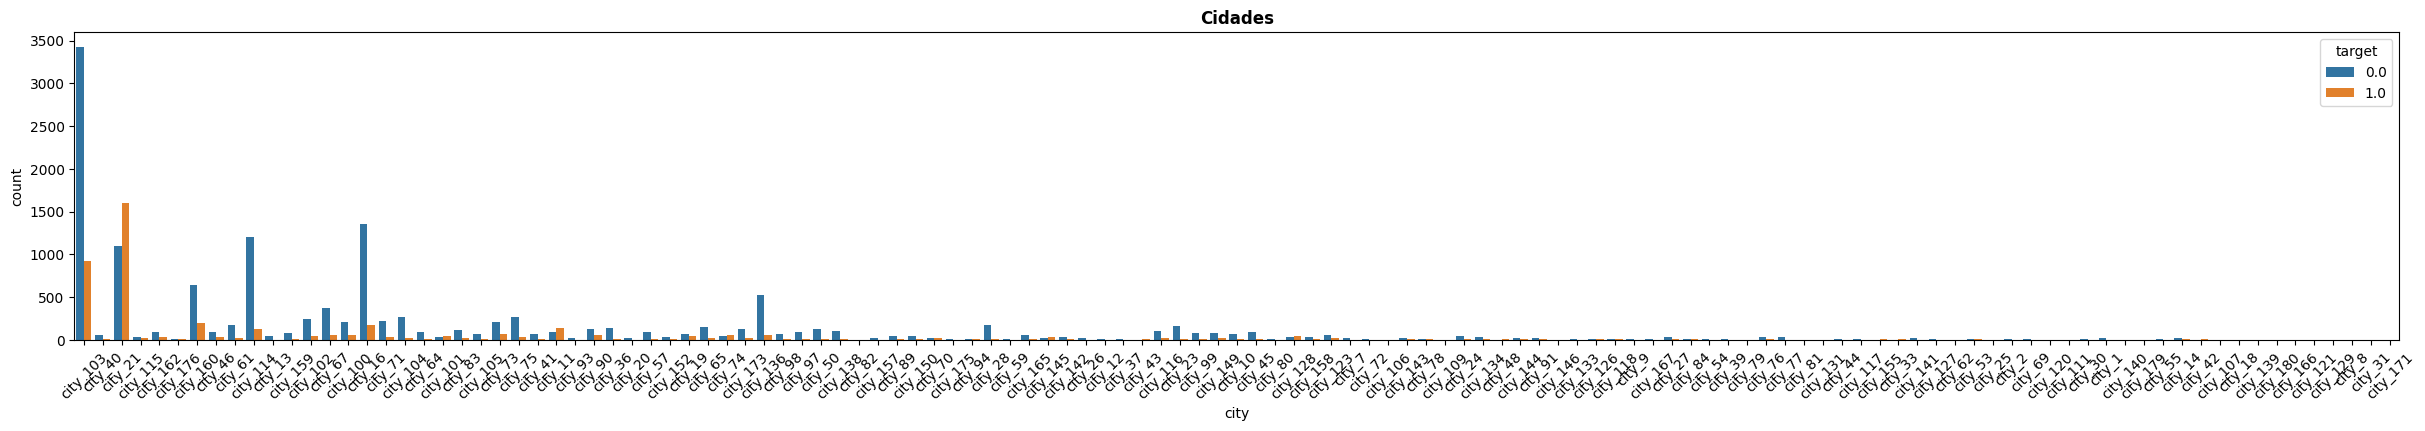

In [21]:
fig, ax = plt.subplots(figsize=(30,4))

sns.countplot(data=train, x='city', hue='target')
ax.set_title('Cidades', fontweight='bold');
ax.tick_params(labelrotation=45, axis='x')

São muitas cidades. Codificar seus nomes (`LabelEncoder`) e depois normalizar (`StandardScaler`) pode ser uma saída para evitar um aumento muito grande de dimensões (`get_dummies`/`oneHot`, muitas cols).

## 5\. Pré-processamento

<center>

| dimensões              | tipo                  | tratamento                    |
| ---------------------- | --------------------- | ----------------------------- |
| city                   | categórica (muitas)   | LabelEncoder + StandardScaler |
| city_development_index | contínua              | StandardScaler                |
| gender                 | categórica (discreta) | oneHot                        |
| relevent_experience    | categórica (ordinal)  | map                           |
| enrolled_university    | categórica (ordinal)  | map                           |
| education_level        | categórica (ordinal)  | map                           |
| major_discipline       | categórica (ordinal)  | map                           |
| experience             | categórica (ordinal)  | map                           |
| company_size           | categórica (ordinal)  | map                           |
| company_type           | categórica (ordinal)  | map                           |
| last_new_job           | categórica (ordinal)  | map                           |
| training_hours         | contínua              | StandardScaler       |

</center>

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,not filled,not filled,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,11-15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,not filled,No relevent experience,Full time course,Graduate,STEM,1-5,not filled,not filled,never,83,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,not filled,Has relevent experience,Part time course,Graduate,STEM,11-15,not filled,not filled,1,24,1.0


In [24]:
cityId = LabelEncoder().fit_transform(dataset['city'])
cityId_norm = StandardScaler().fit_transform(cityId.reshape(-1,1))
dataset['city_norm'] = cityId_norm

In [25]:
gender_dummies = pd.get_dummies(dataset['gender'])

dataset = pd.merge(left=dataset, right=gender_dummies, 
                   left_index=True, right_index=True)\
                   .drop('gender', axis=1)

In [26]:
dataset['relevent_experience_ord'] = \
dataset['relevent_experience'].map({'No relevent experience':0, 'Has relevent experience':1})

In [27]:
enrolled_university_dummies = pd.get_dummies(dataset['enrolled_university'])

dataset = pd.merge(left=dataset, right=enrolled_university_dummies, 
                   left_index=True, right_index=True)\
                   .drop('enrolled_university', axis=1)

In [28]:
print(f"antes: {dataset['education_level'].unique()}")
dataset['education_level_ord'] = \
dataset['education_level'].map({'not filled':0,
                              'Primary School':1,
                              'High School':2,
                              'Graduate':3,
                              'Masters':4,
                              'Phd':5})
print(f"depois: {dataset['education_level_ord'].unique()}")

antes: ['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
depois: [3 4 2 5 1]


In [29]:
print(f"antes: {dataset['major_discipline'].unique()}")
dataset['major_discipline_ord'] = \
dataset['major_discipline'].map({'not filled':0,
                               'Arts':1,
                               'Humanities':2,
                               'Other':3,
                               'No Major':4,
                               'Business Degree':5,
                               'STEM':6})
print(f"depois: {dataset['major_discipline_ord'].unique()}")

antes: ['STEM' 'not filled' 'Arts' 'Humanities' 'Business Degree' 'No Major'
 'Other']
depois: [6 0 1 2 5 4 3]


In [30]:
print(f"antes: {dataset['experience'].unique()}")
dataset['experience_ord'] = dataset['experience'].map({'<1':0,
                                                   '1-5':1,
                                                   '6-10':2,
                                                   '11-15':3,
                                                   '16-20':4,
                                                   '>20':5})
print(f"depois: {dataset['experience_ord'].unique()}")

antes: ['>20' '11-15' '1-5' '6-10' '16-20' '<1']
depois: [5 3 1 2 4 0]


In [31]:
print(f"antes: {dataset['company_size'].unique()}")
dataset['company_size_ord'] = dataset['company_size'].map({'not filled':0,
                                                       '<10':1,
                                                       '10/49':2,
                                                       '50-99':3,
                                                       '100-500':4,
                                                       '500-999':5,
                                                       '1000-4999':6,
                                                       '5000-9999':7,
                                                       '10000+':8})
print(f"depois: {dataset['company_size_ord'].unique()}")

antes: ['not filled' '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49'
 '100-500' '500-999']
depois: [0 3 1 8 7 6 2 4 5]


In [32]:
print(f"antes: {dataset['company_type'].unique()}")
dataset['company_type_ord'] = dataset['company_type'].map({'not filled':0,
                                                       'Other':1,
                                                       'NGO':2,
                                                       'Early Stage Startup':3,
                                                       'Funded Startup':4,
                                                       'Public Sector':5,
                                                       'Pvt Ltd':6})
print(f"depois: {dataset['company_type_ord'].unique()}")

antes: ['not filled' 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
depois: [0 6 4 3 1 5 2]


In [33]:
print(f"antes: {dataset['last_new_job'].unique()}")
dataset['last_new_job_ord'] = dataset['last_new_job'].map({'never':0,
                                                       '1':1,
                                                       '2':2,
                                                       '3':3,
                                                       '4':4,
                                                       '>4':5})
print(f"depois: {dataset['last_new_job_ord'].unique()}")

antes: ['1' '>4' 'never' '4' '3' '2']
depois: [1 5 0 4 3 2]


In [34]:
dataset['training_hours_norm'] = StandardScaler().fit_transform(dataset[['training_hours']])

In [35]:
dataset.head()

,enrollee_id,city,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,Full time course,Part time course,no_enrollment,education_level_ord,major_discipline_ord,experience_ord,company_size_ord,company_type_ord,last_new_job_ord,training_hours_norm
0,8949,city_103,0.920,Has relevent experience,Graduate,STEM,>20,not filled,not filled,1,...,0,0,1,3,6,5,0,0,1,-0.487626
1,29725,city_40,0.776,No relevent experience,Graduate,STEM,11-15,50-99,Pvt Ltd,>4,...,0,0,1,3,6,3,3,6,5,-0.304553
2,11561,city_21,0.624,No relevent experience,Graduate,STEM,1-5,not filled,not filled,never,...,1,0,0,3,6,1,0,0,0,0.294592
4,666,city_162,0.767,Has relevent experience,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,1,4,6,5,3,4,4,-0.953627
5,21651,city_176,0.764,Has relevent experience,Graduate,STEM,11-15,not filled,not filled,1,...,0,1,0,3,6,3,0,0,1,-0.687341


## 6\. Modelos

#### 6.1. **split: treino e teste**

Deixando somente as colunas necessárias e em ordem.

In [36]:
dataset = \
dataset[['city_development_index', 'city_norm','Female', 'Male', 'Other', 'not filled', 
         'relevent_experience_ord','Full time course', 'Part time course', 'no_enrollment',
         'education_level_ord', 'major_discipline_ord', 'experience_ord',
         'company_size_ord', 'company_type_ord', 'last_new_job_ord', 'training_hours_norm', 
         'target']]

Ambos treino e teste tratados, separá-los e remover `target` do teste.

In [37]:
train = dataset.query("target != 0.5")                         # Sera separado entre treino e teste para modelagem e avaliacao.
test = dataset.query("target == 0.5").drop('target', axis=1)   # Sem classificacoes. Apenas para uso "real" do modelo.

print('train:', train.shape, ', test:', test.shape)

train: (18014, 18) , test: (2018, 17)


Separando `train` entre vars de input ($x$) e output ($y$):

In [38]:
train_x = train.drop('target', axis=1)
train_y = train[['target']]

print('train_x:', train_x.shape, ', train_y:', train_y.shape, '\n')

train_x: (18014, 17) , train_y: (18014, 1) 



#### 6.2. **Oversampling**

Usando SMOTE para *oversampling*:

```python
smote = SMOTE(sampling_strategy=<regra_str ou regra_float>)
x_sm, y_sm = smote.fit_resample(train_x, train_y)
```
**regra_str:**

* ``'minority'``: reamostra apenas a classe minoritária;
* ``'not minority'``: reamostra todas as classes menos a classe minoritária;
* ``'not majority'``: reamostra todas as classes, exceto a classe maioria;
* ``'all'``: reamostra todas as classes;
* ``'auto'``: equivalente a ``'not majority'`` (default).

**regra_float:** Corresponde à proporção desejada do número de amostras na classe minoritária sobre o número de amostras na classe majoritária após a reamostragem..

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# antes overampling
print(f'antes da reamostragem: {train_y.value_counts()}', '\n')

# fazendo overampling
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(train_x, train_y)

# depois de oversampling
print(f'depois da reamostragem: {y_sm.value_counts()}')

antes da reamostragem: target
0.0       13593
1.0        4421
dtype: int64 

depois da reamostragem: target
0.0       13593
1.0       13593
dtype: int64


In [41]:
print(x_sm.shape, y_sm.shape)

(27186, 17) (27186, 1)


#### 6.3. **Treino**

Fazendo o split entre treino e teste de $x$ e $y$:

* `x_train`, `y_train`: treinamento dos modelos;
* `x_test`: predição;
* `y_test`: comparação com a predição.

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20389, 17) (6797, 17) (20389, 1) (6797, 1)


In [43]:
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20389, 17) (6797, 17) (20389,) (6797,)


**Modelo 1:** regressão logística

In [44]:
from sklearn.linear_model import LogisticRegression

# definindo e treinando
model_lr = LogisticRegression(C=0.5, penalty='l2', max_iter=2000)
model_lr.fit(X = x_train, y = y_train)

# accuracy
print(f'acc.: {(model_lr.score(X=x_test, y=y_test)*100).round(2)}')

acc.: 76.42


**Modelo 2.1:** árvore de decisão

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# definindo e treinando
model_dt = DecisionTreeClassifier()
model_dt.fit(X = x_train, y = y_train)

# accuracy
print(f'acc.: {(model_dt.score(X=x_test, y=y_test)*100).round(2)}')

acc.: 78.7


**Modelo 2.2:** árvore de decisão com GridSearchCV

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# definindo hiperparametros
hiperparams = {'max_depth': np.arange(2, 10, 1),
               'min_samples_leaf': np.arange(2, 60, 2)}

#max_depth, min_samples_split, and min_samples_leaf

# definindo e treinando
model_dt_grid = GridSearchCV(DecisionTreeClassifier(), 
                             param_grid = hiperparams, refit = True, verbose = 2)
model_dt_grid.fit(X = x_train, y = y_train)

print(model_dt_grid.best_params_)
print(model_dt_grid.best_estimator_)

# accuracy
print(f'acc.: {(model_dt_grid.score(X=x_test, y=y_test)*100).round(2)}')

Fitting 5 folds for each of 232 candidates, totalling 1160 fits
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=6; total time=   0.0s
[CV] END ....................max_depth=2, min

**Modelo 3.1:** SVM

In [48]:
from sklearn.svm import SVC

# definindo e treinando
model_scv = SVC()
model_scv.fit(X = x_train, y = y_train)

# accuracy
print(f'acc.: {(model_scv.score(X=x_test, y=y_test)*100).round(2)}')

acc.: 78.28


**Modelo 3.2:** SVM com GridSearchCV

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# definindo hiperparametros
hiperparams = {'C': [0.1, 1, 10, 100], 
               'gamma': [1, 0.1, 0.01, 0.001],
               'kernel': ['rbf']}

# definindo e treinando
model_scv_grid = GridSearchCV(SVC(), param_grid = hiperparams, refit = True, verbose = 2)
model_scv_grid.fit(X = x_train, y = y_train)

print(model_scv_grid.best_params_)
print(model_scv_grid.best_estimator_)

# accuracy
print(f'acc.: {(model_scv_grid.score(X=x_test, y=y_test)*100).round(2)}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  18.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  20.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  19.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  21.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  19.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  18.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  18.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  17.0s
[CV] END ......................C=0.1, gamma=0.01

#### 6.4. **Predição e avaliação**

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**Modelo 1:** regressão logística

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      3365
         1.0       0.78      0.75      0.76      3432

    accuracy                           0.76      6797
   macro avg       0.76      0.76      0.76      6797
weighted avg       0.76      0.76      0.76      6797



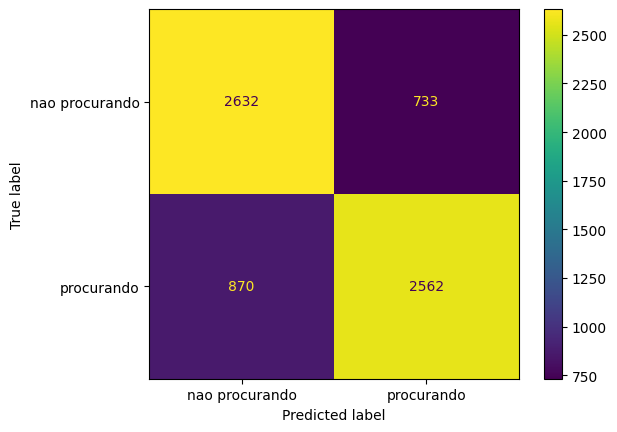

In [51]:
# prevendo
model_1_pred = model_lr.predict(x_test)

# plotando matriz de confusao
cm = confusion_matrix(y_true = y_test, y_pred = model_1_pred)
ConfusionMatrixDisplay(cm, display_labels = ['nao procurando', 'procurando']).plot();

# report
print(classification_report(y_true = y_test, y_pred = model_1_pred))

**Modelo 2.1:** árvore de decisão

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      3365
         1.0       0.79      0.79      0.79      3432

    accuracy                           0.79      6797
   macro avg       0.79      0.79      0.79      6797
weighted avg       0.79      0.79      0.79      6797



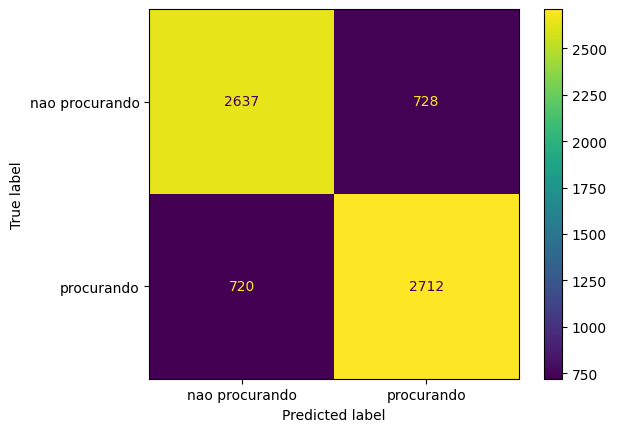

In [52]:
# prevendo
model_2_pred = model_dt.predict(x_test)

# plotando matriz de confusao
cm = confusion_matrix(y_true = y_test, y_pred = model_2_pred)
ConfusionMatrixDisplay(cm, display_labels = ['nao procurando', 'procurando']).plot();

# report
print(classification_report(y_true = y_test, y_pred = model_2_pred))

**Modelo 2.2:** árvore de decisão + GridSearch

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      3365
         1.0       0.80      0.80      0.80      3432

    accuracy                           0.80      6797
   macro avg       0.80      0.80      0.80      6797
weighted avg       0.80      0.80      0.80      6797



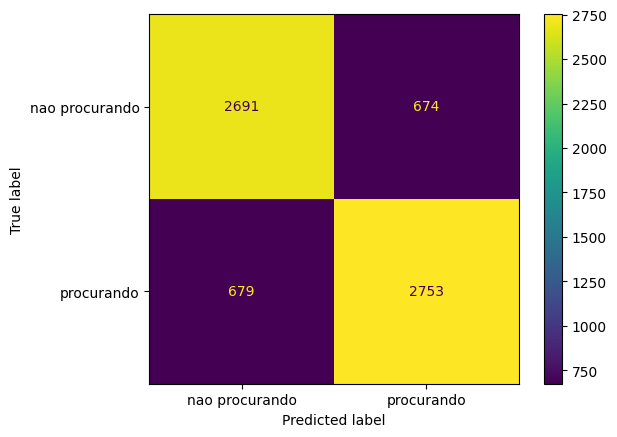

In [53]:
# prevendo
model_2_grid_pred = model_dt_grid.predict(x_test)

# plotando matriz de confusao
cm = confusion_matrix(y_true = y_test, y_pred = model_2_grid_pred)
ConfusionMatrixDisplay(cm, display_labels = ['nao procurando', 'procurando']).plot();

# report
print(classification_report(y_true = y_test, y_pred = model_2_grid_pred))

**Modelo 3.1:** SVM

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      3365
         1.0       0.77      0.81      0.79      3432

    accuracy                           0.78      6797
   macro avg       0.78      0.78      0.78      6797
weighted avg       0.78      0.78      0.78      6797



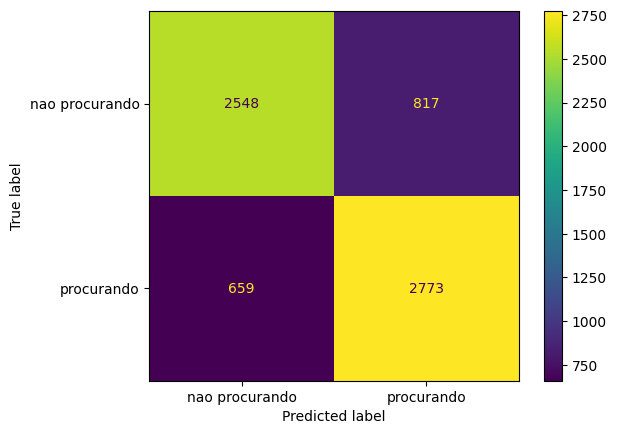

In [54]:
# prevendo
model_3_pred = model_scv.predict(x_test)

# plotando matriz de confusao
cm = confusion_matrix(y_true = y_test, y_pred = model_3_pred)
ConfusionMatrixDisplay(cm, display_labels = ['nao procurando', 'procurando']).plot();

# report
print(classification_report(y_true = y_test, y_pred = model_3_pred))

**Modelo 3.2:** SVM + GridSearch

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      3365
         1.0       0.82      0.82      0.82      3432

    accuracy                           0.82      6797
   macro avg       0.82      0.82      0.82      6797
weighted avg       0.82      0.82      0.82      6797



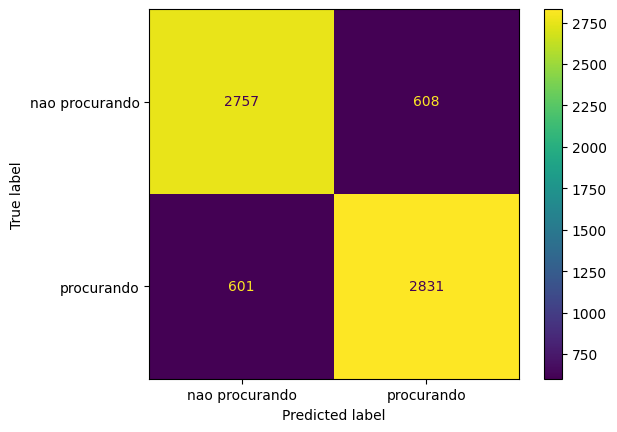

In [55]:
# prevendo
model_3_grid_pred = model_scv_grid.predict(x_test)

# plotando matriz de confusao
cm = confusion_matrix(y_true = y_test, y_pred = model_3_grid_pred)
ConfusionMatrixDisplay(cm, display_labels = ['nao procurando', 'procurando']).plot();

# report
print(classification_report(y_true = y_test, y_pred = model_3_grid_pred))

## 7\. Conclusão

O primeiro modelo, de regressão logística, foi um pouco pior que os demais. Além de uma acurácia um pouco menor, teve uma quantidade maior de falsos negativos, ou seja, classificou em 886 casos 0 (pessoas não procurando mudança) quando eram 1 (procuravam mudar de emprego). Inclusive pelo objetivo do problema, pode ser ruim.

O melhor modelo foi SVM com os seguintes hiperparâmetros:
```python
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
```
Atingiu uma acurácia geral de 82% e, pela matriz de confusão, foi o melhor na relação de falsos positivos e falsos negativos. Ou seja, foi o que melhor previu pessoas estão procurando emprego e de fato estavam, e os que realmente não estão e de fato não estão (diagonal principal).

---

In [60]:
# export:
import pickle
models = ['model_lr', 'model_dt', 'model_scv', 'model_dt_grid', 'model_scv_grid']

for model in models:
  with open(f'{str(model)}.pkl', 'wb') as files:
      pickle.dump(model, files)